In [383]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani.formatters import percent_format
from plotnine import *

pd.set_option('display.max_row',None)

In [ ]:
print(data.iloc[0])

In [385]:
# read and drop non-important columns
data = pd.read_csv('data/listings.csv')
trivial = ['listing_url','scrape_id','last_scraped','source','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','amenities','minimum_minimum_nights','maximum_minimum_nights','host_verifications','maximum_nights','first_review','last_review','bedrooms','bathrooms',
'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','calendar_last_scraped','license']
data.drop(trivial,axis = 1,inplace = True)
data.set_index('id',inplace=True)

# data cleaning: price, transfer from str to float
data.dropna(subset=["price"],inplace=True)
data["price"] = data["price"].str.replace(",", "")
data["price"] = data["price"].str.replace("$", "").astype("float")

# remove extreme values (3 sigma principle)
priceH = data.price.mean()+3*data.price.std()
priceL = data.price.mean()-3*data.price.std()
data = data.loc[(data.price < priceH) & (data.price > priceL) ]
data.price.describe()

count    2119.000000
mean      146.747050
std       133.144515
min        19.000000
25%        82.500000
50%       115.000000
75%       160.000000
max      2000.000000
Name: price, dtype: float64

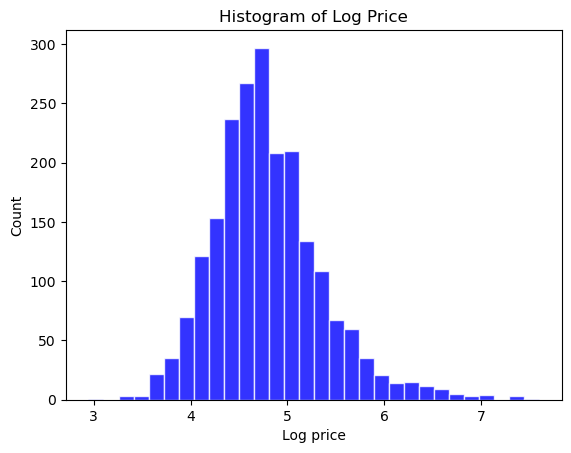

In [386]:
# calculate log price
data["ln_price"] = np.log(data.price)

# plot histogram
plt.hist(data['ln_price'], bins=30, color='blue', edgecolor='white', alpha=0.8)
plt.xlabel('Log price')
plt.ylabel('Count')
plt.title('Histogram of Log Price')
plt.show()

In [387]:
data.room_type.value_counts()

room_type
Entire home/apt    1463
Private room        643
Shared room           9
Hotel room            4
Name: count, dtype: int64

In [388]:
data.room_type = ['entire' if x == "Entire home/apt" else "private" for x in data.room_type]
data["room_type"] = data["room_type"].astype("category")
data.room_type.value_counts()

room_type
entire     1463
private     656
Name: count, dtype: int64

In [389]:
smf.ols(formula="ln_price ~ room_type", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     551.6
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          1.37e-108
Time:                        18:33:18   Log-Likelihood:                -1567.0
No. Observations:                2119   AIC:                             3138.
Df Residuals:                    2117   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.9646      0.013    374.442      0.000       4.939       4.991
room_type[T.private]    -0.5597      0.024    -23.486      0.000      -0.606      -0.513
==============================================================================
Omnibus:                      488.784   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1255.464
Skew:                           1.230   Prob(JB):                    2.40e-273
Kurtosis:                       5.858   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
data.beds.value_counts()

beds
1.0     1318
2.0      484
3.0      161
4.0       60
5.0       29
6.0       14
7.0        3
8.0        3
12.0       1
9.0        1
10.0       1
Name: count, dtype: int64

In [391]:
data.loc[data['beds']>6,'beds'] = 6 # winsorize extreme value
data.beds.describe()

count    2075.000000
mean        1.586506
std         0.980333
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: beds, dtype: float64

In [392]:
smf.ols(formula="ln_price ~ beds", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     569.3
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          2.21e-111
Time:                        18:33:18   Log-Likelihood:                -1526.5
No. Observations:                2075   AIC:                             3057.
Df Residuals:                    2073   BIC:                             3068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3634      0.021    206.779      0.000       4.322       4.405
beds           0.2700      0.011     23.860      0.000       0.248       0.292
==============================================================================
Omnibus:                      358.062   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              984.299
Skew:                           0.910   Prob(JB):                    1.83e-214
Kurtosis:                       5.841   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [393]:
data.bathrooms_text.value_counts()

bathrooms_text
1 bath              1231
1 shared bath        249
1.5 baths            206
2 baths              116
1 private bath       106
1.5 shared baths      80
2.5 baths             56
2 shared baths        24
3 baths               16
Half-bath             11
3.5 baths              5
4 baths                4
2.5 shared baths       3
4.5 baths              3
0 shared baths         2
Shared half-bath       2
0 baths                1
3 shared baths         1
6.5 baths              1
Name: count, dtype: int64

In [394]:
# transfer into numerical
tmp = data.bathrooms_text
tmp = tmp.replace({'Shared half-bath':0.5, 'Half-bath':0.5})
tmp = tmp.str.extractall(r'(\d+(?:\.\d+)?)')
tmp.columns =['n_bath']
tmp = tmp.reset_index(level=1).drop('match',axis=1)
data = data.merge(tmp,left_index=True,right_index=True,how = 'outer', validate='one_to_one')
data.n_bath = data.n_bath.astype('float')
data.n_bath.describe()

count    2104.000000
mean        1.210551
std         0.465769
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.500000
Name: n_bath, dtype: float64

In [395]:
smf.ols(formula="ln_price ~ n_bath", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     337.5
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           4.98e-70
Time:                        18:33:19   Log-Likelihood:                -1639.6
No. Observations:                2104   AIC:                             3283.
Df Residuals:                    2102   BIC:                             3294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2458      0.032    132.496      0.000       4.183       4.309
n_bath         0.4539      0.025     18.372      0.000       0.405       0.502
==============================================================================
Omnibus:                      164.073   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.302
Skew:                           0.561   Prob(JB):                     6.76e-63
Kurtosis:                       4.417   Cond. No.                         5.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [396]:
data.review_scores_rating.describe()

count    1701.000000
mean        4.700964
std         0.460926
min         1.000000
25%         4.590000
50%         4.830000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

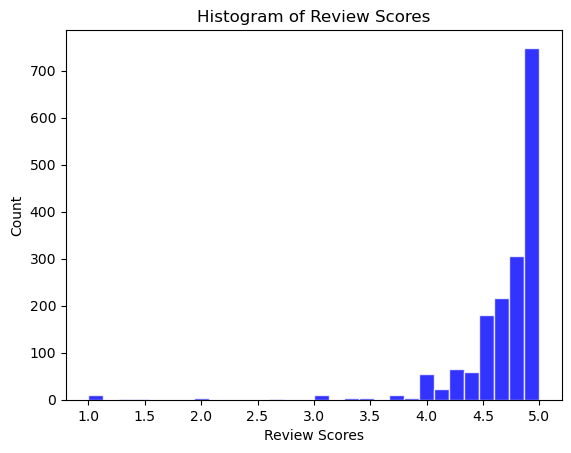

In [397]:
# plot histogram
plt.hist(data['review_scores_rating'], bins=30, color='blue', edgecolor='white', alpha=0.8)
plt.xlabel('Review Scores')
plt.ylabel('Count')
plt.title('Histogram of Review Scores')
plt.show()

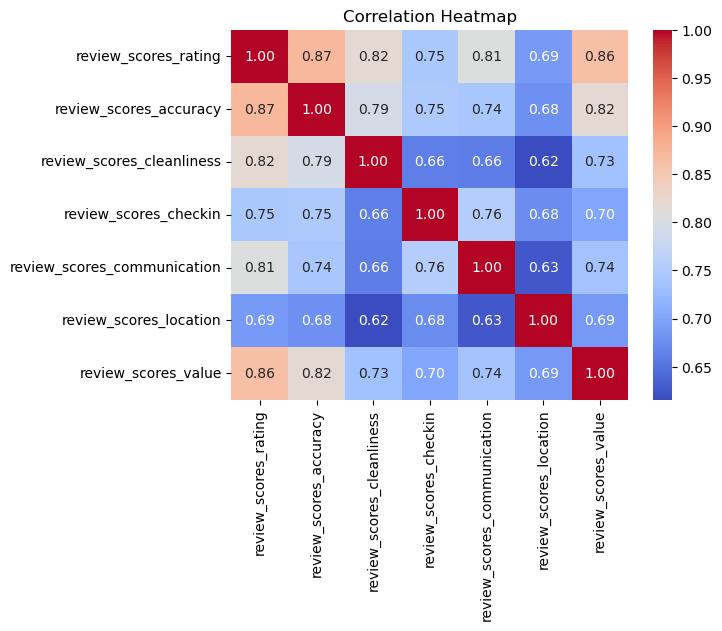

In [398]:
rscores = data.loc[:,[x for x in data.columns if 'review_scores' in x]]
correlation_matrix = rscores.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [405]:
smf.ols(formula="ln_price ~ review_scores_rating", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06187
Date:                Thu, 29 Feb 2024   Prob (F-statistic):              0.804
Time:                        18:34:15   Log-Likelihood:                -1380.5
No. Observations:                1697   AIC:                             2765.
Df Residuals:                    1695   BIC:                             2776.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.7992      0.136     35.344      0.000       4.533       5.065
review_scores_rating    -0.0072      0.029     -0.249      0.804      -0.064       0.049
==============================================================================
Omnibus:                      174.134   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.069
Skew:                           0.738   Prob(JB):                     8.34e-60
Kurtosis:                       4.292   Cond. No.                         50.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [400]:
smf.ols(formula="ln_price ~ review_scores_location", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.711
Date:                Thu, 29 Feb 2024   Prob (F-statistic):             0.0170
Time:                        18:33:20   Log-Likelihood:                -1378.6
No. Observations:                1700   AIC:                             2761.
Df Residuals:                    1698   BIC:                             2772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.3641      0.169     25.857      0.000       4.033       4.695
review_scores_location     0.0842      0.035      2.390      0.017       0.015       0.153
==============================================================================
Omnibus:                      176.461   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.142
Skew:                           0.744   Prob(JB):                     1.09e-60
Kurtosis:                       4.297   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [401]:
data.minimum_nights.describe()

count    2119.000000
mean        7.739500
std        39.159743
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1100.000000
Name: minimum_nights, dtype: float64

In [402]:
minimum_nightsH = data.minimum_nights.mean()+3*data.minimum_nights.std()
minimum_nightsL = data.minimum_nights.mean()-3*data.minimum_nights.std()
data = data.loc[(data.minimum_nights < minimum_nightsH) & (data.minimum_nights > minimum_nightsL) ]
data.minimum_nights.describe()

count    2110.000000
mean        5.730332
std        12.114390
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       120.000000
Name: minimum_nights, dtype: float64

In [403]:
smf.ols(formula="ln_price ~ minimum_nights", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.859
Date:                Thu, 29 Feb 2024   Prob (F-statistic):             0.0276
Time:                        18:33:20   Log-Likelihood:                -1805.3
No. Observations:                2110   AIC:                             3615.
Df Residuals:                    2108   BIC:                             3626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8042      0.014    350.230      0.000       4.777       4.831
minimum_nights    -0.0023      0.001     -2.204      0.028      -0.004      -0.000
==============================================================================
Omnibus:                      291.334   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.481
Skew:                           0.870   Prob(JB):                    1.59e-118
Kurtosis:                       4.773   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [406]:
data.host_is_superhost.value_counts()

host_is_superhost
f    1635
t     452
Name: count, dtype: int64

In [407]:
smf.ols(formula="ln_price ~ host_is_superhost", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.974
Date:                Thu, 29 Feb 2024   Prob (F-statistic):             0.0258
Time:                        18:35:39   Log-Likelihood:                -1790.3
No. Observations:                2087   AIC:                             3585.
Df Residuals:                    2085   BIC:                             3596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.8094      0.014    340.663      0.000       4.782       4.837
host_is_superhost[T.t]    -0.0677      0.030     -2.230      0.026      -0.127      -0.008
==============================================================================
Omnibus:                      281.955   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.509
Skew:                           0.862   Prob(JB):                    1.89e-112
Kurtosis:                       4.717   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [408]:
data.accommodates.describe()

count    2110.000000
mean        2.648815
std         1.516899
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        15.000000
Name: accommodates, dtype: float64

In [411]:
smf.ols(formula="ln_price ~ accommodates", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1081.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          9.32e-192
Time:                        18:36:56   Log-Likelihood:                -1371.0
No. Observations:                2110   AIC:                             2746.
Df Residuals:                    2108   BIC:                             2757.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.2117      0.020    207.340      0.000       4.172       4.252
accommodates     0.2188      0.007     32.880      0.000       0.206       0.232
==============================================================================
Omnibus:                      326.076   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.465
Skew:                           0.842   Prob(JB):                    3.13e-183
Kurtosis:                       5.594   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [414]:
data['ln_accommodates'] = np.log(data['accommodates'])
smf.ols(formula="ln_price ~ ln_accommodates+accommodates", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     572.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          3.81e-199
Time:                        18:37:35   Log-Likelihood:                -1350.2
No. Observations:                2110   AIC:                             2706.
Df Residuals:                    2107   BIC:                             2723.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.2150      0.020    209.438      0.000       4.176       4.254
ln_accommodates     0.3535      0.055      6.471      0.000       0.246       0.461
accommodates        0.1059      0.019      5.676      0.000       0.069       0.142
==============================================================================
Omnibus:                      343.880   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              874.225
Skew:                           0.888   Prob(JB):                    1.46e-190
Kurtosis:                       5.605   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [415]:
data.number_of_reviews.describe()

count    2110.000000
mean       27.450237
std        55.012530
min         0.000000
25%         1.000000
50%         7.000000
75%        29.000000
max       748.000000
Name: number_of_reviews, dtype: float64

In [416]:
smf.ols(formula="ln_price ~ number_of_reviews", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     17.27
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           3.37e-05
Time:                        18:38:31   Log-Likelihood:                -1799.1
No. Observations:                2110   AIC:                             3602.
Df Residuals:                    2108   BIC:                             3614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.8169      0.014    348.609      0.000       4.790       4.844
number_of_reviews    -0.0009      0.000     -4.156      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      285.680   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.827
Skew:                           0.866   Prob(JB):                    3.59e-113
Kurtosis:                       4.700   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [426]:
data['ln_number_of_reviews'] = np.log(data['number_of_reviews']+1e-10 )  # +1e-10 to avoid -inf
data.ln_number_of_reviews.describe()

count    2.110000e+03
mean    -2.514950e+00
std      1.024025e+01
min     -2.302585e+01
25%      1.000000e-10
50%      1.945910e+00
75%      3.367296e+00
max      6.617403e+00
Name: ln_number_of_reviews, dtype: float64

In [427]:
smf.ols(formula="ln_price ~ ln_number_of_reviews+number_of_reviews", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     14.95
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           3.56e-07
Time:                        18:41:48   Log-Likelihood:                -1792.9
No. Observations:                2110   AIC:                             3592.
Df Residuals:                    2107   BIC:                             3609.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.7978      0.015    324.054      0.000       4.769       4.827
ln_number_of_reviews    -0.0045      0.001     -3.541      0.000      -0.007      -0.002
number_of_reviews       -0.0007      0.000     -2.733      0.006      -0.001      -0.000
==============================================================================
Omnibus:                      269.824   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.125
Skew:                           0.837   Prob(JB):                    1.11e-103
Kurtosis:                       4.609   Cond. No.                         73.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## model selection

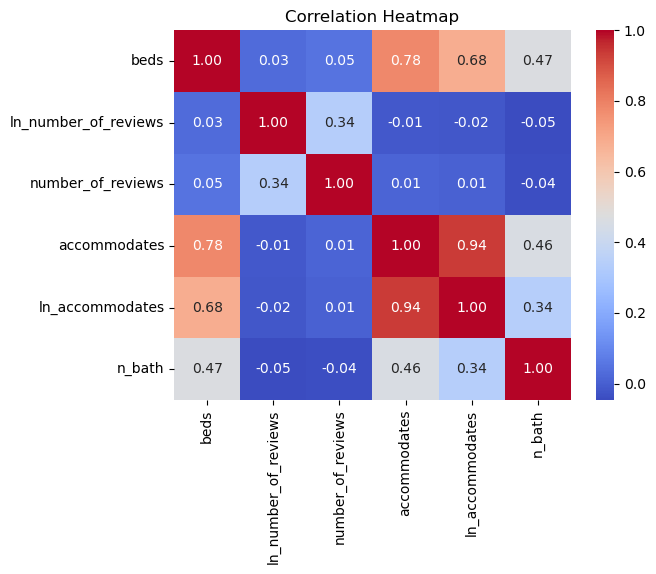

In [433]:
factors = data.loc[:,['beds','ln_number_of_reviews','number_of_reviews','accommodates','ln_accommodates','n_bath']]
correlation_matrix = factors.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [429]:
smf.ols(formula="ln_price ~ room_type+beds+room_type+ln_number_of_reviews+number_of_reviews+accommodates+ln_accommodates+n_bath+host_is_superhost", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     198.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          1.86e-247
Time:                        18:47:20   Log-Likelihood:                -1155.3
No. Observations:                2028   AIC:                             2329.
Df Residuals:                    2019   BIC:                             2379.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.2074      0.032    133.484      0.000       4.146       4.269
room_type[T.private]      -0.3158      0.025    -12.860      0.000      -0.364      -0.268
host_is_superhost[T.t]    -0.0035      0.024     -0.143      0.886      -0.051       0.044
beds                       0.0256      0.016      1.589      0.112      -0.006       0.057
ln_number_of_reviews      -0.0036      0.001     -3.517      0.000      -0.006      -0.002
number_of_reviews         -0.0005      0.000     -2.642      0.008      -0.001      -0.000
accommodates               0.0471      0.022      2.124      0.034       0.004       0.091
ln_accommodates            0.2658      0.058      4.589      0.000       0.152       0.379
n_bath                     0.2485      0.024     10.276      0.000       0.201       0.296
==============================================================================
Omnibus:                      442.386   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1342.714
Skew:                           1.102   Prob(JB):                    2.71e-292
Kurtosis:                       6.322   Cond. No.                         401.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [434]:
smf.ols(formula="ln_price ~ room_type+beds+room_type+ln_number_of_reviews+number_of_reviews+accommodates+ln_accommodates+n_bath", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     231.9
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          4.75e-254
Time:                        18:52:14   Log-Likelihood:                -1157.9
No. Observations:                2051   AIC:                             2332.
Df Residuals:                    2043   BIC:                             2377.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2067      0.031    135.822      0.000       4.146       4.267
room_type[T.private]    -0.3173      0.024    -13.046      0.000      -0.365      -0.270
beds                     0.0255      0.016      1.600      0.110      -0.006       0.057
ln_number_of_reviews    -0.0036      0.001     -3.645      0.000      -0.006      -0.002
number_of_reviews       -0.0005      0.000     -2.725      0.006      -0.001      -0.000
accommodates             0.0468      0.022      2.126      0.034       0.004       0.090
ln_accommodates          0.2671      0.057      4.654      0.000       0.155       0.380
n_bath                   0.2482      0.024     10.330      0.000       0.201       0.295
==============================================================================
Omnibus:                      452.890   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1400.595
Skew:                           1.109   Prob(JB):                    7.32e-305
Kurtosis:                       6.387   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""